In [218]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [219]:
df= pd.read_csv('Salaries.csv')

In [220]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [222]:

df['yrs.since.phd'].unique()

array([19, 20,  4, 45, 40,  6, 30, 21, 18, 12,  7,  1,  2, 38, 37, 39, 31,
       36, 34, 24, 13, 35,  5, 11, 22, 41,  9, 23, 25, 28, 16, 14, 10,  8,
        3, 33, 17, 29, 26, 43, 15, 42, 32, 54, 56, 27, 48, 46, 47, 52, 51,
       49, 44], dtype=int64)

In [223]:
df['rank'].unique()   # we will encode this  like  Prof:1, AsstProf: 3, AssocProf: 2

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [224]:
df['discipline'].unique()  # seems A is good discipline professor

array(['B', 'A'], dtype=object)

In [225]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

# Null Values

In [226]:
df.isnull().sum()   # No null values

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

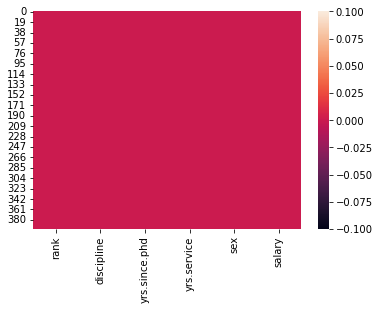

In [227]:
sns.heatmap(df.isnull())

# Univariate Analysis()

<AxesSubplot:xlabel='rank', ylabel='salary'>

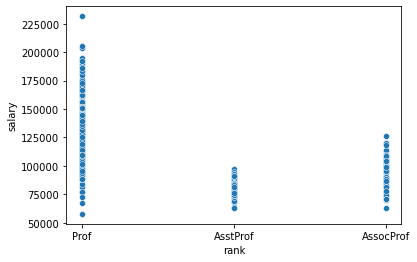

In [228]:
sns.scatterplot(x='rank',y='salary',data=df)

Conclusion:  Prof has high salary, then Associate prof and then asstprof

<AxesSubplot:xlabel='discipline', ylabel='count'>

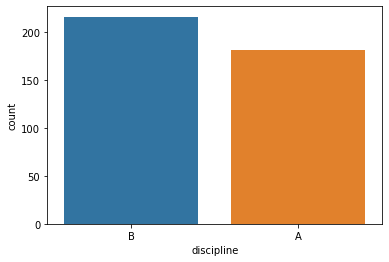

In [229]:
sns.countplot(x='discipline', data=df) # More professiors have discipline B

<AxesSubplot:xlabel='rank', ylabel='count'>

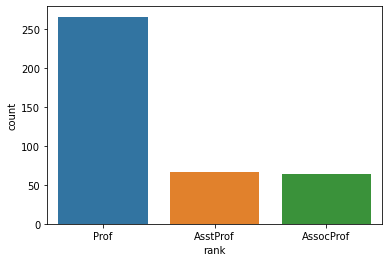

In [230]:
sns.countplot('rank', data=df)

In [231]:
df['rank'].value_counts()  # Prof count is 266, associate prof is 64  and associate prof is 67

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='count'>

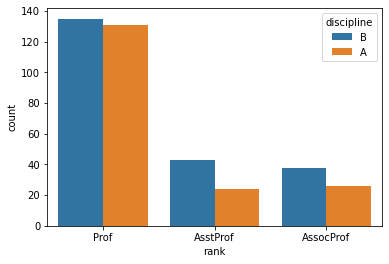

In [232]:
sns.countplot(x='rank',hue='discipline', data=df)

In [233]:
# Mostly prof, assoprof, asstprof have discipline B

<AxesSubplot:xlabel='rank', ylabel='yrs.service'>

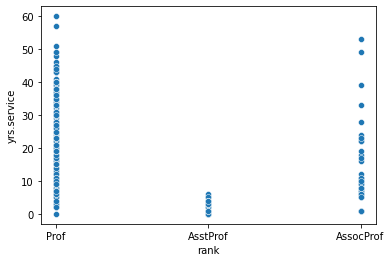

In [234]:
sns.scatterplot(x='rank',y='yrs.service', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

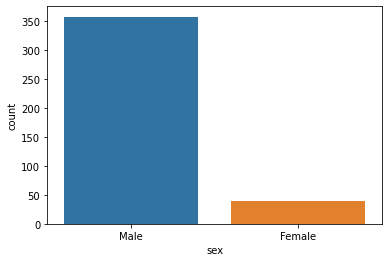

In [235]:
# Male vs Female in rank
sns.countplot(x='sex',data=df)  # We have majority of Male Proff

In [236]:
gender=df['sex'].value_counts().index

In [237]:
gender

Index(['Male', 'Female'], dtype='object')

In [238]:
gender_value= df['sex'].value_counts().values
gender_value

array([358,  39], dtype=int64)

([<matplotlib.patches.Wedge at 0x2203999e070>,
 [Text(-1.0480290059707078, 0.3341185457948273, 'Male'),
  Text(1.0480289825088784, -0.3341186193874942, 'Female')],
 [Text(-0.5716521850749315, 0.18224647952445122, '90.18%'),
  Text(0.57165217227757, -0.1822465196659059, '9.82%')])

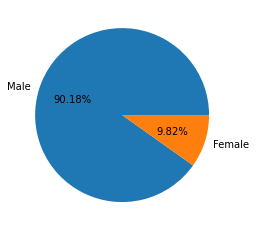

In [239]:
plt.pie(gender_value, labels=gender, autopct="%1.2f%%")

In [240]:
# Conslusion:  90% are Male professor and 10% are female professor

In [241]:
rank=df['rank'].value_counts().index

In [242]:
rankvalue=df['rank'].value_counts().values

([<matplotlib.patches.Wedge at 0x220399ef310>,
 [Text(-0.5600204235664406, 0.9467719499375045, 'Prof'),
  Text(0.030462284581484863, -1.0995781232900539, 'AsstProf'),
  Text(0.9619174276875219, -0.5335867898580523, 'AssocProf')],
 [Text(-0.30546568558169485, 0.5164210636022751, '67.00%'),
  Text(0.01661579158990083, -0.5997698854309383, '16.88%'),
  Text(0.5246822332841028, -0.291047339922574, '16.12%')])

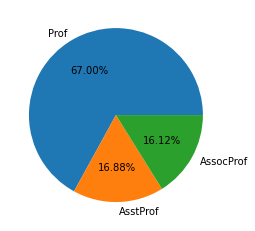

In [243]:
plt.pie(rankvalue, labels=rank, autopct="%1.2f%%")

In [244]:
# Conclusion:  67% are professor, 16.88 are asst professor while 16.12% are associate professor

<AxesSubplot:xlabel='rank', ylabel='count'>

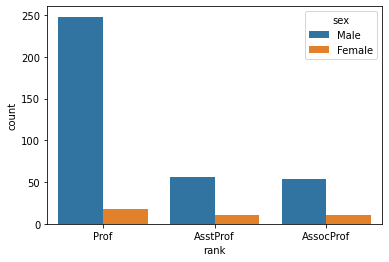

In [245]:
sns.countplot(x='rank',hue='sex', data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

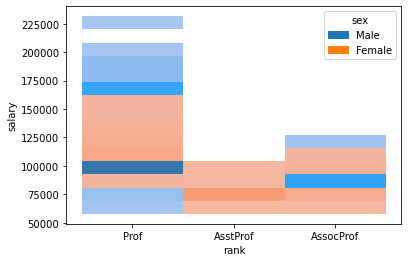

In [246]:
sns.histplot(x='rank',y='salary',hue='sex', data=df)

In [247]:
df.groupby(['rank','sex'])['sex'].count()

rank       sex   
AssocProf  Female     10
           Male       54
AsstProf   Female     11
           Male       56
Prof       Female     18
           Male      248
Name: sex, dtype: int64

In [248]:
# Observation: Although femals are only 10% in which more Female are Professor

In [249]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Columns vs Salary

In [250]:
#Mean salary of rankwise
df.groupby('rank')['salary'].mean()

rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: salary, dtype: float64

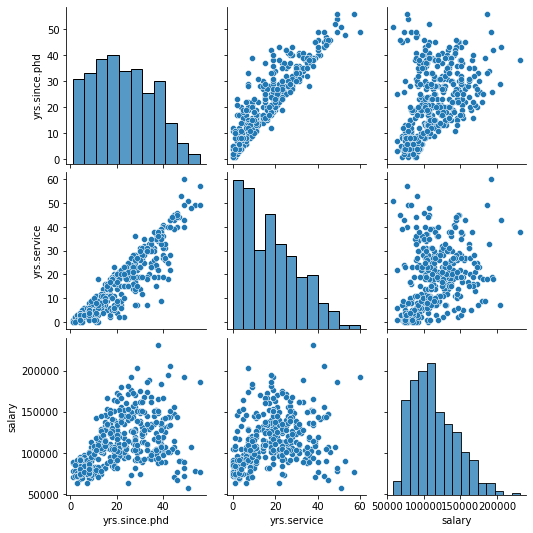

In [251]:
sns.pairplot(df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

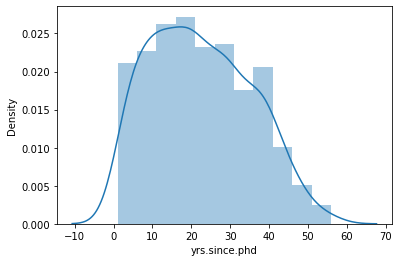

In [252]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

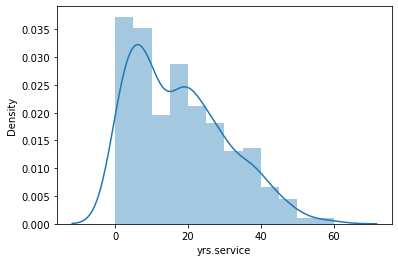

In [253]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

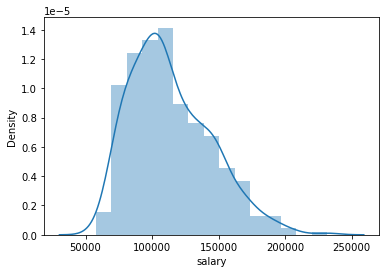

In [254]:
sns.distplot(df['salary'])

In [255]:
# Skewness present in coulumns

In [256]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [257]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

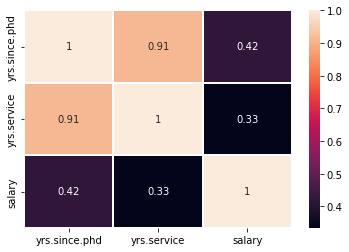

In [258]:
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=.25)

In [259]:
df.drop('yrs.service',axis=1, inplace=True)

In [260]:
df.head()

,rank,discipline,yrs.since.phd,sex,salary
0,Prof,B,19,Male,139750
1,Prof,B,20,Male,173200
2,AsstProf,B,4,Male,79750
3,Prof,B,45,Male,115000
4,Prof,B,40,Male,141500


In [294]:
df_cat=df[[column for column in df.columns if df[column].dtypes=='O']]
df_cat

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [262]:
df_num=df[[column for column in df.columns if df[column].dtypes !='O' ]]
df_num

,yrs.since.phd,salary
0,19,139750
1,20,173200
2,4,79750
3,45,115000
4,40,141500
...,...,...
392,33,103106
393,31,150564
394,42,101738
395,25,95329


# Outliers checking

<AxesSubplot:>

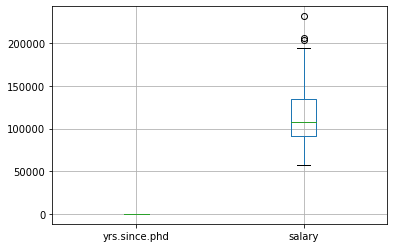

In [263]:
df_num.boxplot()

<AxesSubplot:xlabel='yrs.since.phd'>

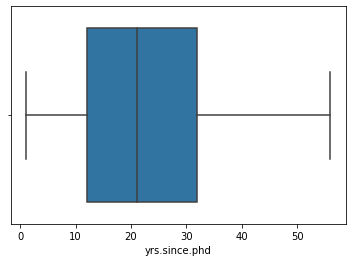

In [264]:
sns.boxplot(df['yrs.since.phd'],orient='h' )

<AxesSubplot:xlabel='salary'>

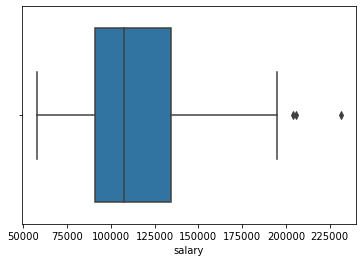

In [265]:
sns.boxplot(df['salary'],orient='h' )

In [266]:
# Conclusion:  Salary have few outliers, we need to handle them
df_num.skew()

yrs.since.phd    0.300880
salary           0.714568
dtype: float64

In [267]:
#Replacing outlier with higher cap (90%) here as outliers are above.

df_num['salary'].quantile(.90)

152946.00000000003

In [268]:
df_num['salary'].max()

231545

In [269]:
#df['salary']= np.where(df['salary']>high,high,df['salary'])

# (IQR) proximity rule.
The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

<AxesSubplot:xlabel='salary', ylabel='Density'>

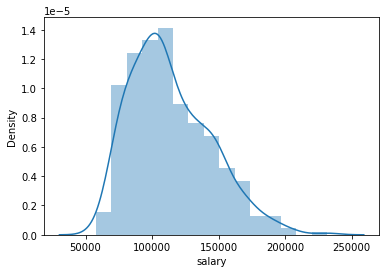

In [270]:
sns.distplot(df_num['salary'])

In [271]:
IQR= df.salary.quantile(.75)- df.salary.quantile(.25)
IQR

43185.0

In [272]:
# Q3 + 1.5 IQR are outliers.

upper_cap= df_num['salary'].quantile(.75)+ (1.5 * IQR)
upper_cap

198962.5

In [273]:
# Replace outliers with upper cap

df_num['salary']= np.where(df_num['salary']>upper_cap,upper_cap,df_num['salary']  )

<AxesSubplot:xlabel='salary', ylabel='Density'>

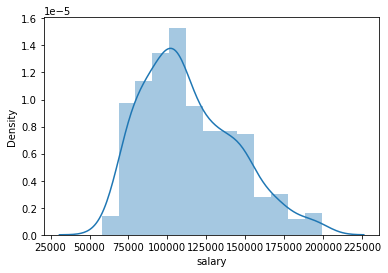

In [274]:
sns.distplot(df_num['salary'])

In [275]:
df_num.skew()

yrs.since.phd    0.300880
salary           0.630253
dtype: float64

In [276]:
# It has removed some skewness from salary column, from .7145  to  .63.0

In [277]:
df_num

,yrs.since.phd,salary
0,19,139750.0
1,20,173200.0
2,4,79750.0
3,45,115000.0
4,40,141500.0
...,...,...
392,33,103106.0
393,31,150564.0
394,42,101738.0
395,25,95329.0


In [278]:
#Points
x=df_num.iloc[:,:-1]
y=df_num.iloc[:,-1]

# we need to add categoricals columns to X after encoding

In [279]:
x

,yrs.since.phd
0,19
1,20
2,4
3,45
4,40
...,...
392,33
393,31
394,42
395,25


# Transformation()

In [280]:
from sklearn.preprocessing import power_transform
x=power_transform(x, method='box-cox')


# Standardization()

In [281]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[-0.12294314],
       [-0.04529591],
       [-1.63292287],
       [ 1.5595717 ],
       [ 1.27543796],
       [-1.36388746],
       [ 0.66017251],
       [ 1.5595717 ],
       [ 0.03080915],
       [-0.20224757],
       [-0.72175875],
       [-1.24319611],
       [-2.18500357],
       [-1.9654573 ],
       [-0.04529591],
       [-0.72175875],
       [-0.12294314],
       [ 1.15783006],
       [ 1.09809659],
       [ 1.21693637],
       [ 0.72506668],
       [ 1.03771209],
       [ 0.91488629],
       [ 0.25083761],
       [-0.6289452 ],
       [ 0.03080915],
       [ 0.97665107],
       [-1.49296969],
       [-0.81773087],
       [-0.72175875],
       [-0.04529591],
       [-1.24319611],
       [-0.6289452 ],
       [-1.63292287],
       [-1.63292287],
       [-1.49296969],
       [ 0.10547402],
       [-1.24319611],
       [ 1.33335589],
       [-1.02089518],
       [ 0.17878967],
       [ 0.17878967],
       [ 1.27543796],
       [ 1.15783006],
       [-0.12294314],
       [ 0

In [310]:
x=pd.DataFrame(x)

# Lets encode for categorical features

In [295]:
df_cat

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [296]:
df_cat['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [297]:
df_cat['rank']=df_cat['rank'].map({'AsstProf':1,'AssocProf':2,'Prof':3})

In [298]:
df_cat['discipline']= df_cat['discipline'].map({'B':1,'A':2})

In [304]:
df_cat['sex_onehot']=   pd.get_dummies(df_cat['sex'],drop_first=True)

In [307]:
df_cat.drop('sex', axis=1,inplace=True)

In [308]:
df_cat

,rank,discipline,sex_onehot
0,3,1,1
1,3,1,1
2,1,1,1
3,3,1,1
4,3,1,1
...,...,...,...
392,3,2,1
393,3,2,1
394,3,2,1
395,3,2,1


In [313]:
# Combine total inputs
x=pd.concat([df_cat,x],axis=1)

In [322]:
x.shape

(397, 4)

In [323]:
y.shape

(397,)

In [325]:
x

,rank,discipline,sex_onehot,0
0,3,1,1,-0.122943
1,3,1,1,-0.045296
2,1,1,1,-1.632923
3,3,1,1,1.559572
4,3,1,1,1.275438
...,...,...,...,...
392,3,2,1,0.852389
393,3,2,1,0.725067
394,3,2,1,1.390710
395,3,2,1,0.321691


In [328]:
y= pd.DataFrame(y)
y

,salary
0,139750.0
1,173200.0
2,79750.0
3,115000.0
4,141500.0
...,...
392,103106.0
393,150564.0
394,101738.0
395,95329.0


# Machine Learning

In [316]:
# This is a regression problem statement

In [329]:
# For Train Test split, need to find best Random state value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()

In [336]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=55, test_size=.20)
lr.fit(x_train,y_train)


LinearRegression()

In [344]:
ppp=lr.predict(x_test)

In [357]:
mean_squared_error(y_test,ppp)

1169426944.2568874

In [351]:
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i, test_size=.20)
    lr.fit(x_train,y_train)
    predict_train=lr.predict(x_train)
    predict_test=lr.predict(x_test)
    if round(mean_squared_error(y_train,predict_train)*100,10)== round(mean_squared_error(y_test,predict_test)*100,10):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Training Mean squared error is: ", round(mean_squared_error(y_train,predict_train)*100,2))
        print('Test Mean squared error is: ', round(mean_squared_error(y_test,predict_test)*100,2))
        print('X'*50,'\n')
    else: print("Not equalls")

Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not equalls
Not 